### Importing libraries and data

In [1]:
!pip install pydataset shap --quiet

### Data Prep

In [2]:
from pydataset import data
import pandas as pd

In [3]:
df = data('Housing')
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [4]:
df = pd.get_dummies(df, drop_first=True, dtype=int)
df.head()

,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
1,42000.0,5850,3,1,2,1,1,0,1,0,0,0
2,38500.0,4000,2,1,1,0,1,0,0,0,0,0
3,49500.0,3060,3,1,1,0,1,0,0,0,0,0
4,60500.0,6650,3,1,2,0,1,1,0,0,0,0
5,61000.0,6360,2,1,1,0,1,0,0,0,0,0


In [5]:
# isolate X and y
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

In [6]:
# training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1502)

### Random Forest

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=20, random_state=1502)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=1502)

### SHAP

In [8]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
X_test.columns

Index(['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl', 'driveway_yes',
       'recroom_yes', 'fullbase_yes', 'gashw_yes', 'airco_yes',
       'prefarea_yes'],
      dtype='object')

### Depencency plots

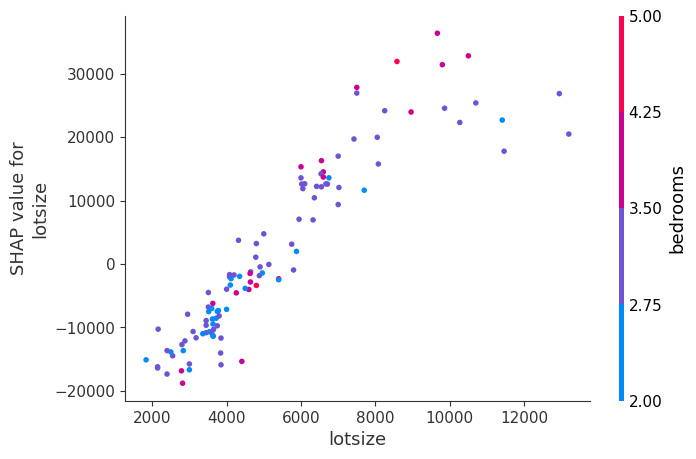

In [10]:
shap.dependence_plot("lotsize", shap_values, X_test)

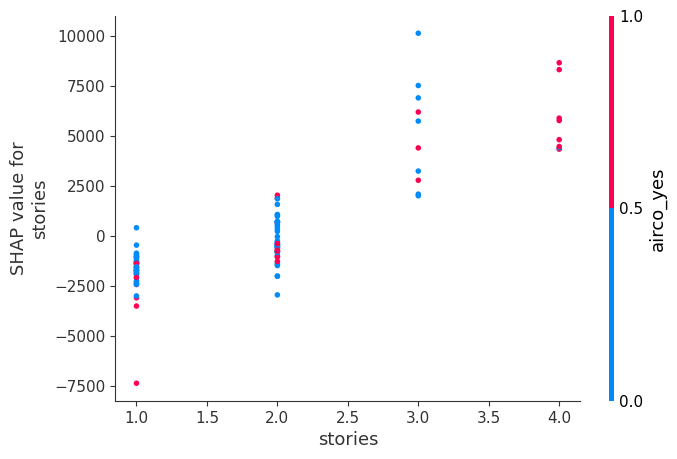

In [11]:
shap.dependence_plot("stories", shap_values, X_test)